<a href="https://colab.research.google.com/github/bryaanabraham/deep_learning_and_reinforcement_learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

#true values:
b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T
print(y)
print()
x_mat

[23.86674957 61.68624767 66.79845258 29.41074939 70.76547894 56.09264864
 45.67809664 35.80804927 26.8785609  25.23124316 47.72600919 21.43529434
 41.91484231 44.00963442 30.29742062 26.70596273 49.68594665 26.63865948
 56.47297911 33.55899854 36.42067103 51.83906662 42.81736097 14.64456057
 22.84985186 20.72840145 57.64104086 39.80516022 16.58093762 57.65435644
 27.50873544 25.33905901 26.78877243 62.57820959 29.64465437 27.53058372
 44.05094678 46.37233695 45.16213161 44.58250356 46.46371806 52.81936682
 26.90061856 23.7923908  25.90461681 42.47517063 45.26828655 24.06857565
 49.33070581 44.34609667 38.80977998 40.91636907 44.78662278 40.99763836
 30.16899477 42.75247227 19.53121799 51.90819546 36.36077066 51.18996032
 28.77497134 53.96637376 20.80013815 12.9231236  27.74356561 30.58789805
  7.05360002 66.4202978  15.09140838 50.20892089 51.52662961 37.3580706
 10.16929997 10.23182131 23.68095989 51.31908201 46.58230114 26.29875551
 12.54675954 21.29654374 15.47298669 24.02296503 46.

array([[1.        , 9.82742345, 0.31440549],
       [1.        , 8.134176  , 8.63715436],
       [1.        , 9.7161639 , 9.27856025],
       [1.        , 5.40803447, 3.61742571],
       [1.        , 9.76648779, 9.90318851],
       [1.        , 5.92720763, 8.62549828],
       [1.        , 3.58966019, 7.48668431],
       [1.        , 2.47559712, 5.84407947],
       [1.        , 5.11894754, 3.1665907 ],
       [1.        , 5.43022561, 2.70403958],
       [1.        , 5.62338141, 7.0211968 ],
       [1.        , 5.44324456, 1.7200706 ],
       [1.        , 1.65664065, 7.47281043],
       [1.        , 4.0908501 , 6.7637872 ],
       [1.        , 5.92020896, 3.22489884],
       [1.        , 0.72871169, 4.78581623],
       [1.        , 1.25809015, 9.13998812],
       [1.        , 4.33702187, 3.19872439],
       [1.        , 6.14784771, 8.54922249],
       [1.        , 1.27809315, 5.90571152],
       [1.        , 2.02091705, 6.12454342],
       [1.        , 7.48137262, 7.20283807],
       [1.

In [ ]:
# Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.4851806 , 1.98354728, 5.00425146])

Setting fit_intercept=False in a linear regression model means that you are explicitly instructing the model not to estimate an intercept term (i.e., the y-intercept) in the linear equation. Instead, the model will assume that the line or hyperplane representing the linear relationship between the independent variables (features) and the dependent variable (target) must pass through the origin (0,0) in the feature space.

In [ ]:
#solving using matrix multiplication
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.4851806 , 1.98354728, 5.00425146])

###Solving by Gradient Descent<br>
For most numerical problems, we don't / can't know the underlying analytical solution. This is because we only arrive at analytical solutions by solving the equations mathematically, with pen and paper. That is more often than not just impossible. Fortunately, we have a way of converging to an approximate solution, by using Gradient Descent.

We will explore this very useful method because Neural Networks, along with many other complicated algorithms, are trained using Gradient Descent. Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate and other parameters. We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

In [ ]:
learning_rate = 1e-3
num_iter = 10000
theta_initial = np.array([3,3,3])

In [ ]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    theta_path = np.zeros((num_iter+1,3))
    theta_path[0,:]= theta_initial

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]=theta
    return theta_path, loss_vec

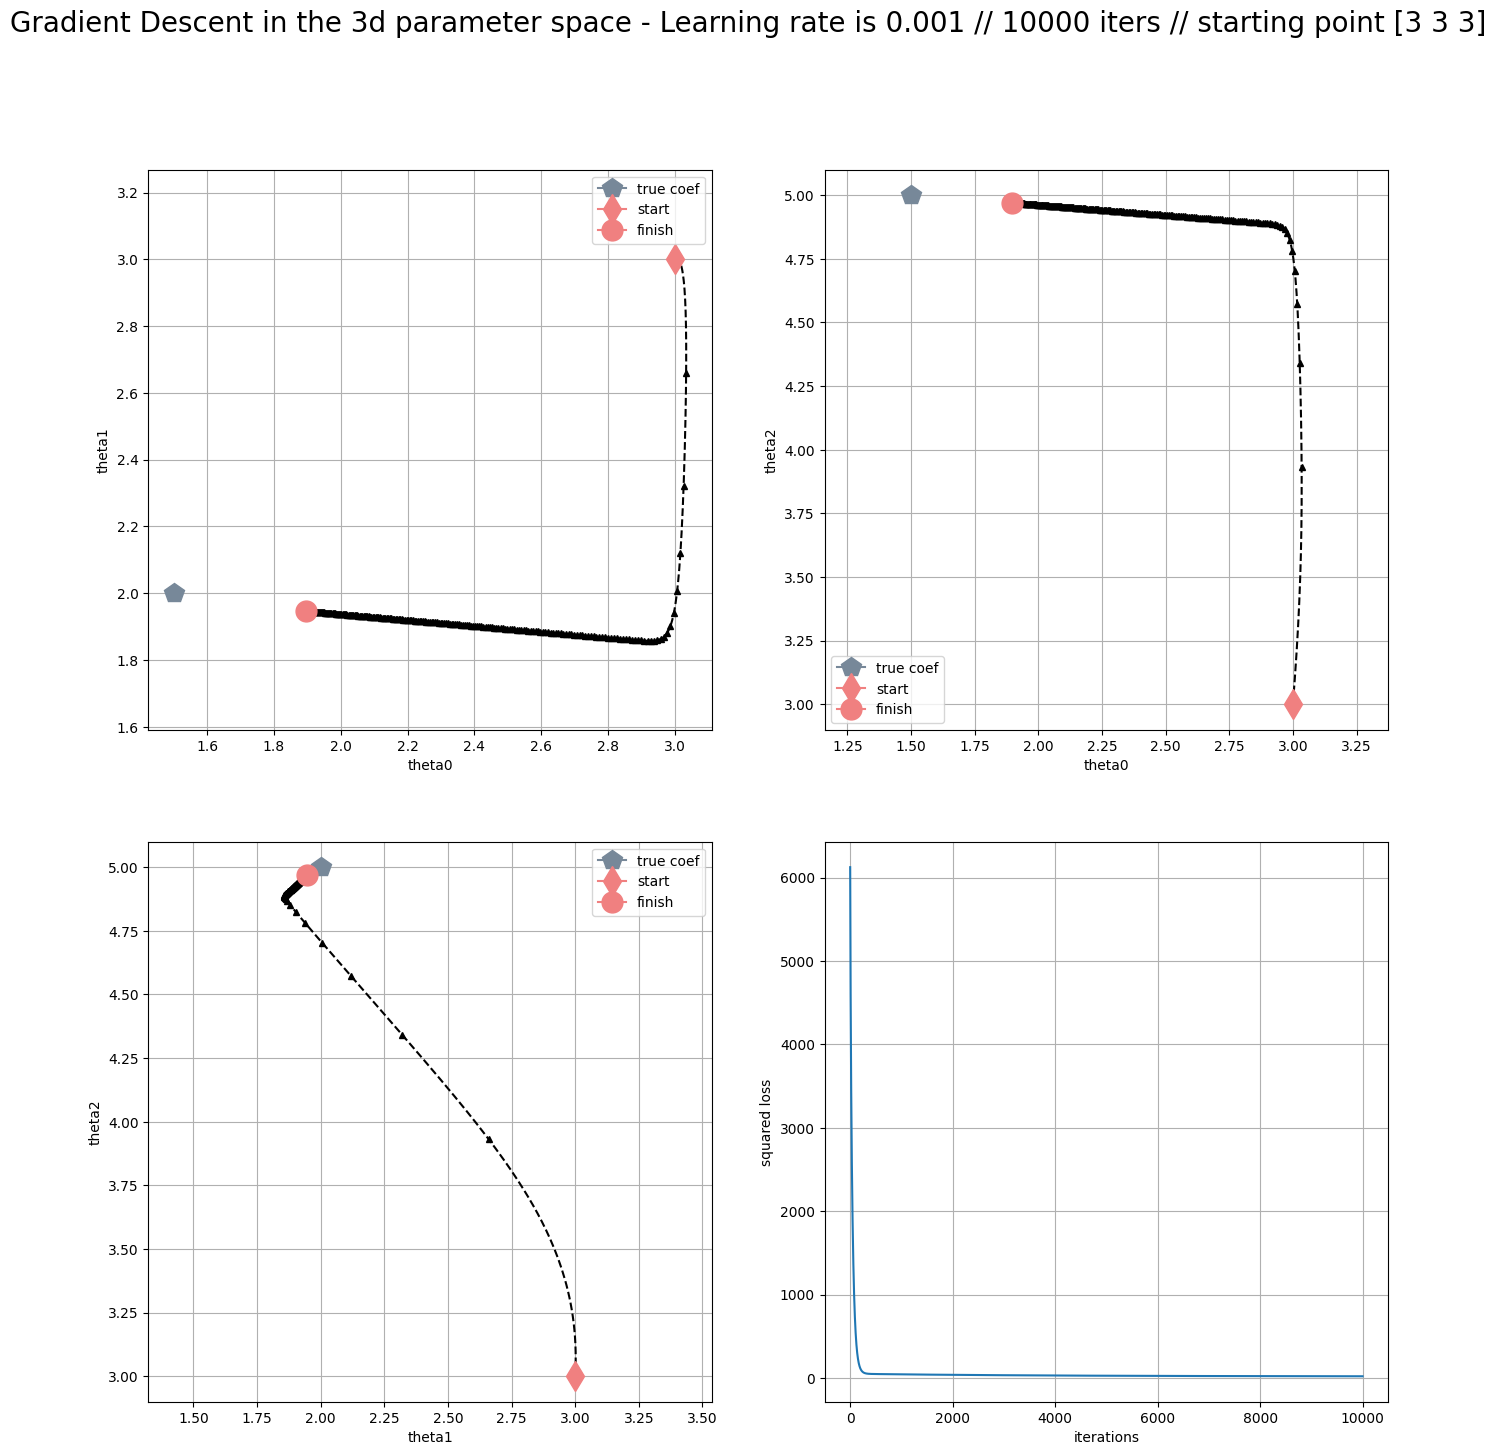

In [ ]:
true_coef = [b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef',
            color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^',
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d',
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o',
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')


def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate,
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)


theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)

